In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker

In [214]:
def get_data(fname='defects_bands/band_0.pickle'):
    with open(fname, 'rb') as handle:
        data = pickle.load(handle)
    return data
def plot_bands(fname,ax):
    data=get_data(fname+"/band_energies.pickle")
    ef=data['reference']
    e=data['energies']-ef
    k=data['path'].get_linear_kpoint_axis()
    for i in e:ax.plot(k[0],np.flip(i),c="#ffcb49",lw=2)
    ax.set_ylim(-4,4)
    ax.axhline(0,c="w",ls="-")
    ax.set_facecolor('k')
    x_path=data['path'].get_linear_kpoint_axis()[1]
    x_path[1]+=0.28
    ax.set_xticks(x_path)
    for i in x_path:
        ax.axvline(i,c="w",ls="--",lw=2)
    name=['L','$\\Gamma$','X']
    ax.set_xticklabels(name)
    ax.set_xlim(k[0].min(),k[0].max())

def plot_bands_pseudospectral(fname,ax):
    data=get_data(fname+"/band_energies.pickle")
    ef=data['reference']
    e=data['energies']-ef
    k=data['path'].get_linear_kpoint_axis()
    
    n=1000
    x=np.linspace(-4,4,n)
    # mu=e[0][0]
    eta=2e-2
    A=np.zeros((len(k[0]),n))
    broad=lambda x,mu,eta : np.exp(-np.power(x - mu, 2.) / (2 * np.power(eta, 2.)))
    for cnt,mu in enumerate(e[0]):
        y=np.zeros(nk)
        for i in mu:
            y+=broad(x,i,eta)
        A[cnt]=y
    A/=A.max()
    ax.contourf(k[0],x,np.flip(A.T,axis=1),90,cmap="hot",vmin=0,vmax=0.8)
    ax.axhline(0,c="w",ls="-")
    
    x_path=data['path'].get_linear_kpoint_axis()[1]
    x_path[1]+=0.28
    ax.set_xticks(x_path)
    for i in x_path:
        ax.axvline(i,c="w",ls="--",lw=2)
    name=['L','$\\Gamma$','X']
    ax.set_xticklabels(name)
    ax.set_ylim([-4,+4])
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.linspace(start, end, 5))

    labels = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(['{:.1f}'.format(i) for i in np.linspace(-4,+4,len(labels))])
    
    
def plot_spectrum(fname='../defects_final/0.630/',ax=None,scale=[0.0,0.2,0.21,0.22,0.23,0],eref=None):
    
    def get_bandfile(fname):
        import os
        import re

        rootdir = fname
        regex = re.compile('(.*pickle$)|(.*rar$)|(.*r01$)')

        for root, dirs, files in os.walk(rootdir):
            for file in files:
                if regex.match(file):
                    return file
    
    
    
    part_fname=range(30)
    kx=0
    lab=[]
    x_max=[]
    if eref==None:
        data=get_data(fname=fname+get_bandfile(fname))
        eref=data['reference']
    for j,i in enumerate(part_fname):
        try:
            e, A_ke, x1, X, points_name = pickle.load(open(fname+'sf_3x3_defect_{}.pckl'.format(i),
                                                          'rb'))  

            A_ke /= np.max(A_ke)
            A_ek = A_ke.T
            A_ekc = np.reshape(A_ek, (A_ek.shape[0], A_ek.shape[1]))
            x=[]
            for l in range(A_ekc.shape[1]):
                x.append(kx)
                kx=kx+np.diff(x1)[0]
            x=np.array(x)-j*np.diff(x1)[0]*scale[j]
            ax.contourf(x,
                        np.linspace(e.min(),e.max(),A_ekc.shape[0]),
                        A_ekc,
                        90,
                        cmap="hot",
                        vmin=0,
                        vmax=0.6,)
            x_max.append(x)
        except:None

    e, A_ke, x, X, name = pickle.load(open(fname+'sf_3x3_defect_{}.pckl'.format(0),
                                                              'rb'))  
    name=['L','$\\Gamma$','X']
    x-=np.diff(x)[0]*(len(X)+1)
    X=np.array(X)-np.diff(x)[0]*(len(X)+1)
    
    ax.set_xticks(X)
    ax.set_xticklabels(name)
    xmax=np.concatenate(x_max, axis=0 ).max()
    xmin=np.concatenate(x_max, axis=0 ).min()
    X[0]=xmin
    X[-1]=xmax
    for i in X:ax.axvline(i,c="w",ls="--",lw=2)
    ax.set_xlim(xmax,xmin)
    ax.set_ylim([eref-4,eref+4])
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.linspace(start, end, 5))

    labels = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(['{:.1f}'.format(i) for i in np.linspace(-4,+4,len(labels))])
    ax.axhline(eref,c="w")

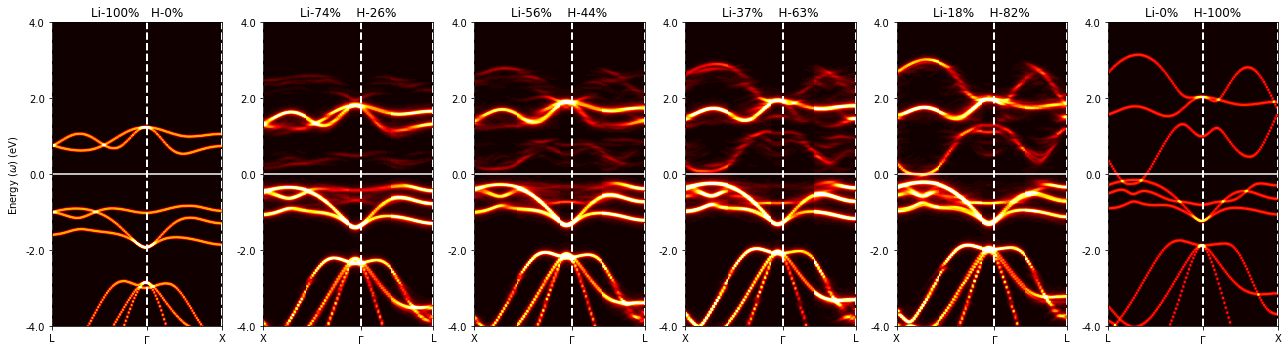

In [216]:
n=6
fig,ax1=plt.subplots(1,n,figsize=(3*n,5))

ax=ax1[-1]
scale=[0.87]*30
# plot_spectrum('1.000/',ax,scale=scale)
plot_bands_pseudospectral('1.000',ax)
ax.set_title("Li-0%    H-100%")


ax=ax1[-2]
plot_spectrum('0.815/',ax,scale=[0.0,0.9,0.9,0.9,0.,0,0])
ax.set_title("Li-18%    H-82%")


ax=ax1[-3]
plot_spectrum('0.630/',ax,scale=[0.0,0.9,0.9,0.9,0.,0,0])
ax.set_title("Li-37%    H-63%")


ax=ax1[-4]
plot_spectrum('0.444/',ax,scale=[0.0,0.9,0.9,0.9,0.,0,0])
ax.set_title("Li-56%    H-44%")



ax=ax1[-5]
plot_spectrum('0.259/',ax,scale=[0.0,0.9,0.9,0.9,0.,0,0])
ax.set_title("Li-74%    H-26%")


ax=ax1[0]
scale=[0.9]*20
plot_bands_pseudospectral('0.000',ax)
ax.set_title("Li-100%   H-0%")
ax.set_ylabel("Energy ($\\omega$) (eV)")



plt.tight_layout()
# fig.suptitle('$A(k,\\omega)$')
plt.savefig("defect_Akw.png",dpi=300)
plt.show()

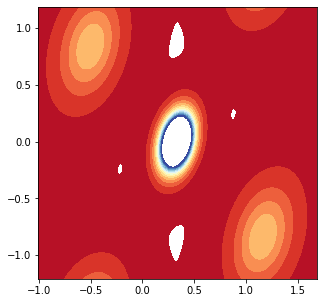

In [17]:
dens, atoms = read_cube_data('pure_li/density.cube')
bader, atoms = read_cube_data('pure_li/AtIndex.cube')
x = len(dens) // 2
dens_mean = dens[x]
bader = bader[x]


x0, y0, z0 = atoms.positions[0]
y = np.linspace(0, atoms.cell[1, 1], len(dens), endpoint=False) - y0
z = np.linspace(0, atoms.cell[0, 0], len(dens[0]), endpoint=False) - z0
plt.figure(figsize=(5, 5))
plt.contourf(z, y, dens, np.linspace(0.01, 0.9, 15),cmap="RdYlBu")